In [15]:
import numpy as np
import pandas as pd
import ScraperFC as sfc
import traceback
from mplsoccer import VerticalPitch, add_image
import matplotlib.pyplot as plt
from PIL import Image
import urllib

In [2]:
# Initialize the Understat scraper
scraper = sfc.Understat()
try:
    # Scrape the table
    lg_table = scraper.scrape_shot_xy(year=2024, league="EPL")
except:
    # Catch and print any exceptions. This allows us to still close the
    # scraper below, even if an exception occurs.
    traceback.print_exc()
finally:
    # It"s important to close the scraper when you"re done with it. Otherwise,
    # you"ll have a bunch of webdrivers open and running in the background.
    scraper.close()

Shot XY:   0%|          | 0/39 [00:00<?, ?it/s]

In [3]:
# define match ID
match_id = 21926
match_id = str(match_id)

In [4]:
# creating scoreboard
home_team = lg_table[match_id]['h'][0]['h_team']
away_team = lg_table[match_id]['h'][0]['a_team']
home_goals = lg_table[match_id]['h'][0]['h_goals']
away_goals = lg_table[match_id]['h'][0]['a_goals']

scoreboard = '{} {}-{} {}'.format(home_team, home_goals, away_goals, away_team)

In [5]:
# create shots dataframe for home team
home_shots = len(lg_table[match_id]['h'])

for i in range(home_shots):
    if i == 0:
        home_shots_arr = np.array([[float(lg_table[match_id]['h'][i]['X']), 
                                    float(lg_table[match_id]['h'][i]['Y']),
                                    float(lg_table[match_id]['h'][i]['xG']),
                                    str(lg_table[match_id]['h'][i]['result'])]])
        
    else:
        home_shots_arr = np.append(home_shots_arr, 
                                   [[float(lg_table[match_id]['h'][i]['X']), 
                                     float(lg_table[match_id]['h'][i]['Y']),
                                     float(lg_table[match_id]['h'][i]['xG']),
                                     str(lg_table[match_id]['h'][i]['result'])]],
                                   axis=0)

df_home_shots = pd.DataFrame(data=home_shots_arr, columns=['x', 'y', 'xG', 'Result'])
df_home_shots['x'] = df_home_shots['x'].astype(float)*100
df_home_shots['y'] = df_home_shots['y'].astype(float)*100
df_home_shots['xG'] = df_home_shots['xG'].astype(float)

In [6]:
# split home shots to goals and no goals
df_home_goals = df_home_shots.loc[(df_home_shots['Result']=='Goal')]
df_home_nogoals = df_home_shots.loc[(df_home_shots['Result']!='Goal')]
xG_home = df_home_shots.xG.sum()

In [7]:
# create shots dataframe for away team
away_shots = len(lg_table[match_id]['a'])

for i in range(away_shots):
    if i == 0:
        away_shots_arr = np.array([[float(lg_table[match_id]['a'][i]['X']), 
                                    float(lg_table[match_id]['a'][i]['Y']),
                                    float(lg_table[match_id]['a'][i]['xG']),
                                    str(lg_table[match_id]['a'][i]['result'])]])
        
    else:
        away_shots_arr = np.append(away_shots_arr, 
                                   [[float(lg_table[match_id]['a'][i]['X']), 
                                     float(lg_table[match_id]['a'][i]['Y']),
                                     float(lg_table[match_id]['a'][i]['xG']),
                                     str(lg_table[match_id]['a'][i]['result'])]],
                                   axis=0)

df_away_shots = pd.DataFrame(data=away_shots_arr, columns=['x', 'y', 'xG', 'Result'])
df_away_shots['x'] = df_away_shots['x'].astype(float)*100
df_away_shots['y'] = df_away_shots['y'].astype(float)*100
df_away_shots['xG'] = df_away_shots['xG'].astype(float)

In [8]:
# split home shots to goals and no goals
df_away_goals = df_away_shots.loc[(df_away_shots['Result']=='Goal')]
df_away_nogoals = df_away_shots.loc[(df_away_shots['Result']!='Goal')]
xG_away = df_away_shots.xG.sum()

In [9]:
# shot distance
home_shot_dist = df_home_shots['x'].mean()
away_shot_dist = df_away_shots['x'].mean()

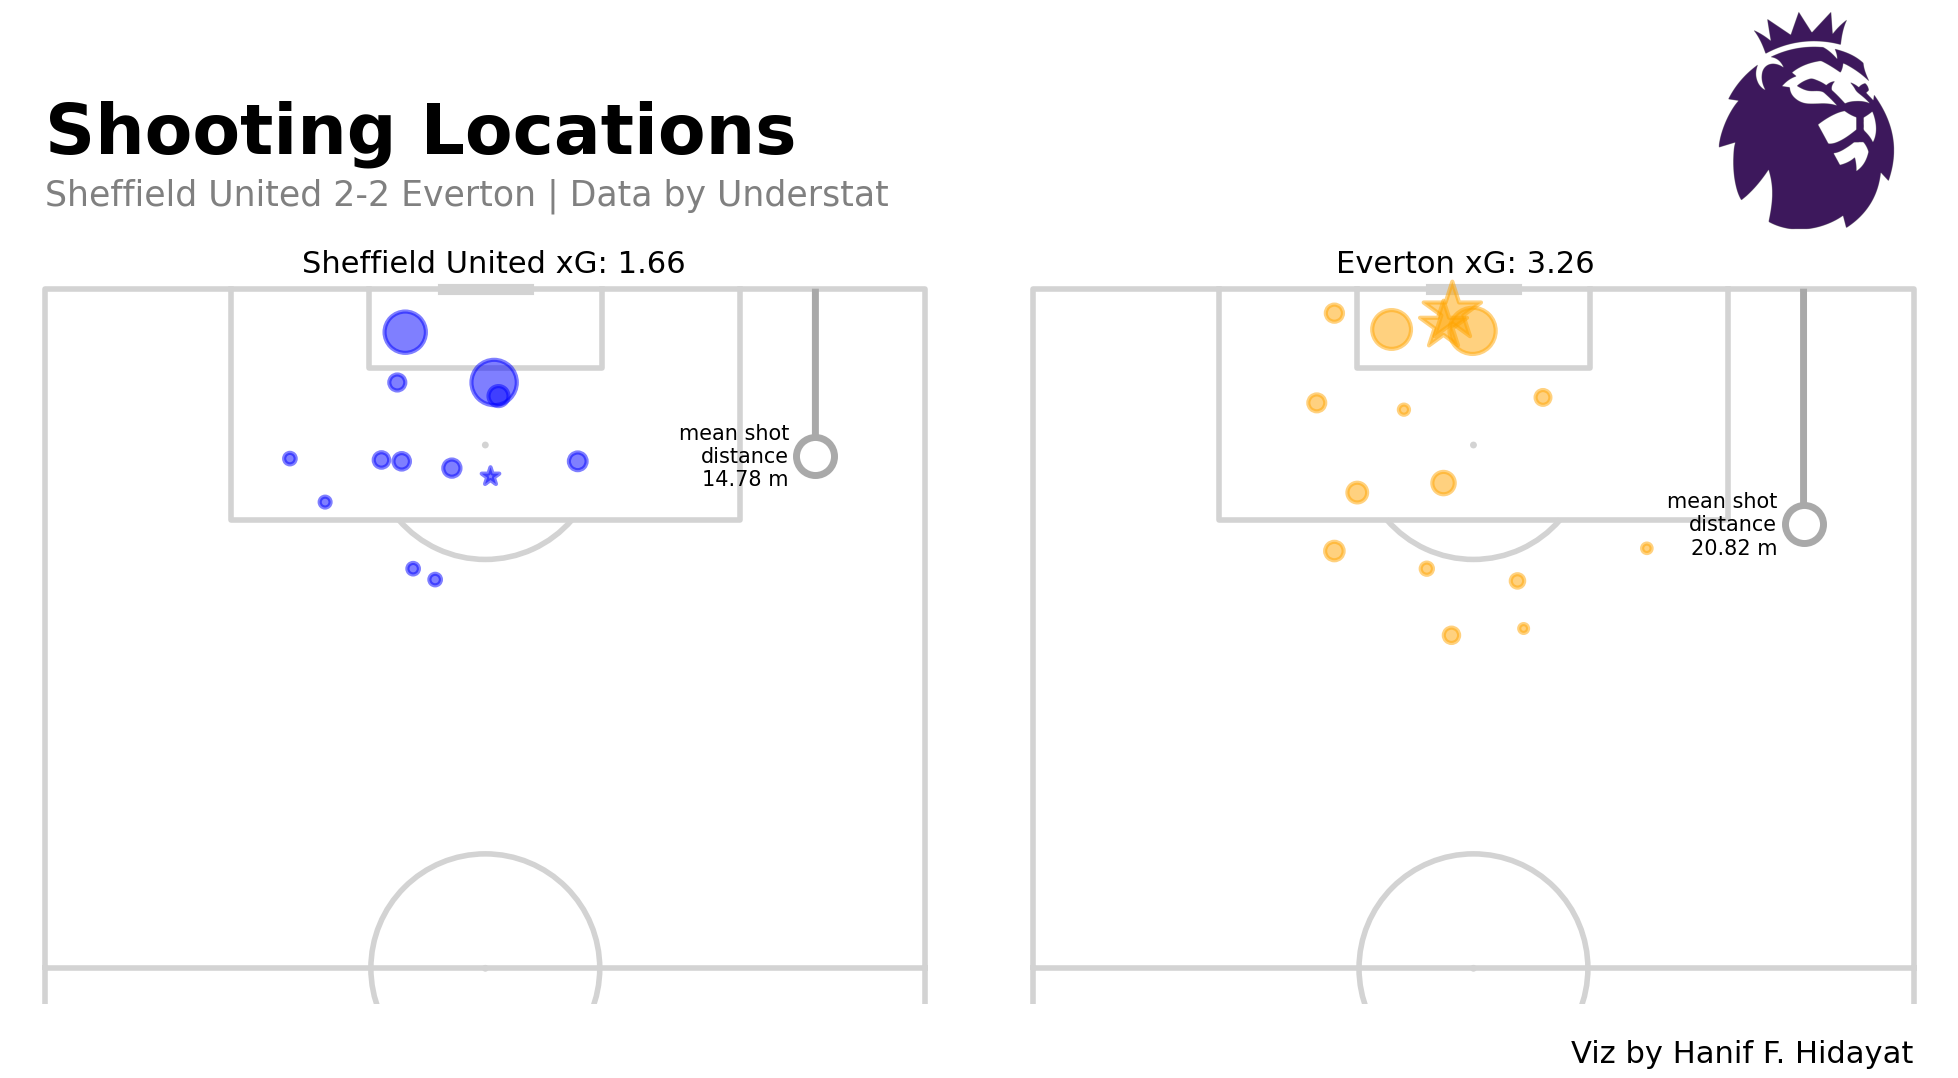

In [16]:
pitch = VerticalPitch(pitch_type='opta', 
                      pitch_color='white', 
                      line_color='lightgrey',
                      linewidth=4,
                      half=True)

# set up the plot grid
fig, axs = pitch.grid(ncols=2, 
                      figheight=10, 
                      title_height=.2, 
                      grid_height=.75, 
                      endnote_height=.05, 
                      title_space=0, 
                      endnote_space=0, 
                      axis=False)

# set up the color
fig.set_facecolor('white')

# plot goal positions for home team
scatter = pitch.scatter(df_home_goals.x, 
                        df_home_goals.y, 
                        s=df_home_goals.xG*2000, 
                        color='blue',
                        marker='*',
                        alpha=.5,
                        linewidths=3,
                        ax=axs['pitch'][0],
                        zorder=2)

# plot shot positions for home team
scatter = pitch.scatter(df_home_nogoals.x, 
                        df_home_nogoals.y, 
                        s=df_home_nogoals.xG*2000, 
                        color='blue',
                        marker='o',
                        alpha=.5,
                        linewidths=3,
                        ax=axs['pitch'][0],
                        zorder=2)

# plot shot distance for home team
vline = pitch.lines(xstart=home_shot_dist, 
                    ystart=12.5, 
                    xend=100, 
                    yend=12.5,
                    ax=axs['pitch'][0],
                    color='darkgrey',
                    zorder=3)

head = pitch.scatter(home_shot_dist, 12.5,
                     s=750,
                     color='white',
                     linewidths=5,
                     edgecolors='darkgrey',
                     ax=axs['pitch'][0],
                     zorder=4)

text = pitch.annotate(xy=(home_shot_dist, 15.5),
                      text='mean shot\ndistance\n{:.2f} m'.format((100-home_shot_dist)*1.2),
                      ha='right',
                      va='center',
                      ax=axs['pitch'][0],
                      fontsize=15,
                      zorder=5
                      )

# plot goal positions for away team
scatter = pitch.scatter(df_away_goals.x, 
                        df_away_goals.y, 
                        s=df_away_goals.xG*2000, 
                        color='orange',
                        marker='*',
                        alpha=.5,
                        linewidths=3,
                        ax=axs['pitch'][1],
                        zorder=2)

# plot shot positions for away team
scatter = pitch.scatter(df_away_nogoals.x, 
                        df_away_nogoals.y, 
                        s=df_away_nogoals.xG*2000, 
                        color='orange',
                        marker='o',
                        alpha=.5,
                        linewidths=3,
                        ax=axs['pitch'][1],
                        zorder=2)

# plot shot distance for away team
vline = pitch.lines(xstart=away_shot_dist, 
                    ystart=12.5, 
                    xend=100, 
                    yend=12.5,
                    ax=axs['pitch'][1],
                    color='darkgrey',
                    zorder=3)

head = pitch.scatter(away_shot_dist, 12.5,
                     s=750,
                     color='white',
                     linewidths=5,
                     edgecolors='darkgrey',
                     ax=axs['pitch'][1],
                     zorder=4)

text = pitch.annotate(xy=(away_shot_dist, 15.5),
                      text='mean shot\ndistance\n{:.2f} m'.format((100-away_shot_dist)*1.2),
                      ha='right',
                      va='center',
                      ax=axs['pitch'][1],
                      fontsize=15,
                      zorder=5
                      )

# set up the plot title
axs['title'].text(0, .43, 
                  'Shooting Locations', 
                  va='bottom', 
                  ha='left', 
                  weight='bold',
                  fontsize=50)

axs['title'].text(0, .2, 
                  '{} | Data by Understat'.format(scoreboard), 
                  color='grey',
                  va='bottom', 
                  ha='left', 
                  fontsize=25)


axs['title'].text(.24, -0.05, 
                     "{} xG: {:.2f}".format(home_team, xG_home), 
                     va='center', 
                     ha='center', 
                     fontsize=22)

axs['title'].text(.76, -0.05, 
                     "{} xG: {:.2f}".format(away_team, xG_away), 
                     va='center', 
                     ha='center', 
                     fontsize=22)

logo = Image.open(r"Logos\premier-league.png")

axs['title'] = add_image(logo, 
                         fig, 
                         left=0.85, 
                         bottom=0.82, 
                         width=0.11)

# set up the footer
axs['endnote'].text(1, 0, 
                    'Viz by Hanif F. Hidayat', 
                     va='center', 
                     ha='right', 
                     fontsize=22)

plt.savefig(r"Plot\ShootingMap.png",
            facecolor='#FFFFFF',
            edgecolor='none',
            bbox_inches='tight', 
            dpi=200,
            transparent=False)